<a href="https://colab.research.google.com/github/ElcimarAires/Projetos-Pessoais/blob/main/ELT575_Semana3_118579.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVERSIDADE FEDERAL DE VIÇOSA**

PÓS-GRADUAÇÃO EM INTELIGENCIA ARTIFICIAL E COMPUTACIONAL

DISCIPLINA: ELT575 APRENDIZADO PROFUNDO

NOME: ELCIMAR AIRES

MATRICULA: 118579


In [1]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Importando os dados

Arquivo arquivo tesla_stock_2015_2022 para previsão de valores de ações da TESLA.

In [13]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('tesla_stock_2015_2022.csv')
data = df[['Date', 'Open']]

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalizar a coluna 'Open'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Open'].values.reshape(-1, 1))


<ipython-input-13-00cfc003dc83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


**Dividir o Dataset em Treino e Teste**

Sendo 20% do total da série como dados de teste.

In [14]:
training_data_len = int(np.ceil(0.8 * len(scaled_data)))

train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]


**Criar Sequências de Dados para o Modelo LSTM**

In [15]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Redimensionar para ser compatível com o LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


**Construindo e treinando o Modelo LSTM**

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1256/1256 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - loss: 9.0081e-04


**Fazer Previsões e Avaliar o Modelo**

In [17]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverter a normalização para y_test
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
RMSE: 49.308218322437185


RMSE (Root Mean Square Error): É a Raiz do Erro Médio Quadrático. Esse valor é uma métrica que quantifica o quão preciso é o modelo. Especificamente, ele mede a média das diferenças ao quadrado entre os valores reais e os valores previstos e, em seguida, toma a raiz quadrada desse valor.

**Verificando os resultados**

<ipython-input-18-480fdea91437>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


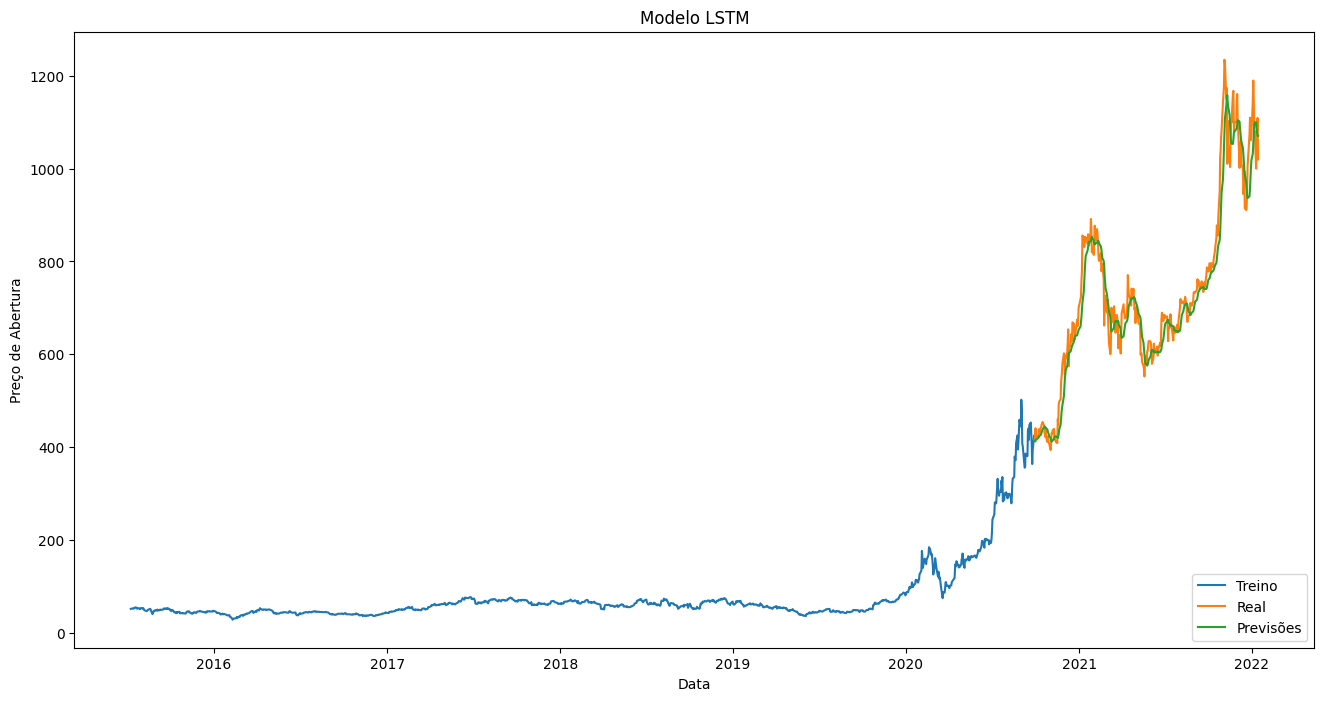

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Modelo LSTM')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Treino', 'Real', 'Previsões'], loc='lower right')
plt.show()


# **PARTE** II

Experimente adicionar mais uma camada LSTM após a primeira (mesmo número de unidades ocultas do item anterior). Reporte o resultado da mesma forma que o item anterior e comente se houve melhora.

          



Modificar o Modelo para Adicionar Mais uma Camada LSTM
Primeiro, ajustamos o modelo existente para incluir uma segunda camada LSTM com 50 unidades ocultas. A primeira camada LSTM deve ter o parâmetro return_sequences=True para garantir que a saída da primeira LSTM seja uma sequência, que servirá de entrada para a próxima LSTM.

In [19]:
# Criar o modelo com duas camadas LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Primeira LSTM
model.add(LSTM(50, return_sequences=False))  # Segunda LSTM
model.add(Dense(1))  # Camada densa para saída

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, batch_size=1, epochs=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1256/1256 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - loss: 7.9277e-04


Fazer Previsões e Avaliar o Modelo com a Nova Estrutura

In [20]:
# Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverter a normalização para y_test
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
RMSE: 915405.8097681219


**Visualizar os Resultados**

<ipython-input-21-832fc54346d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


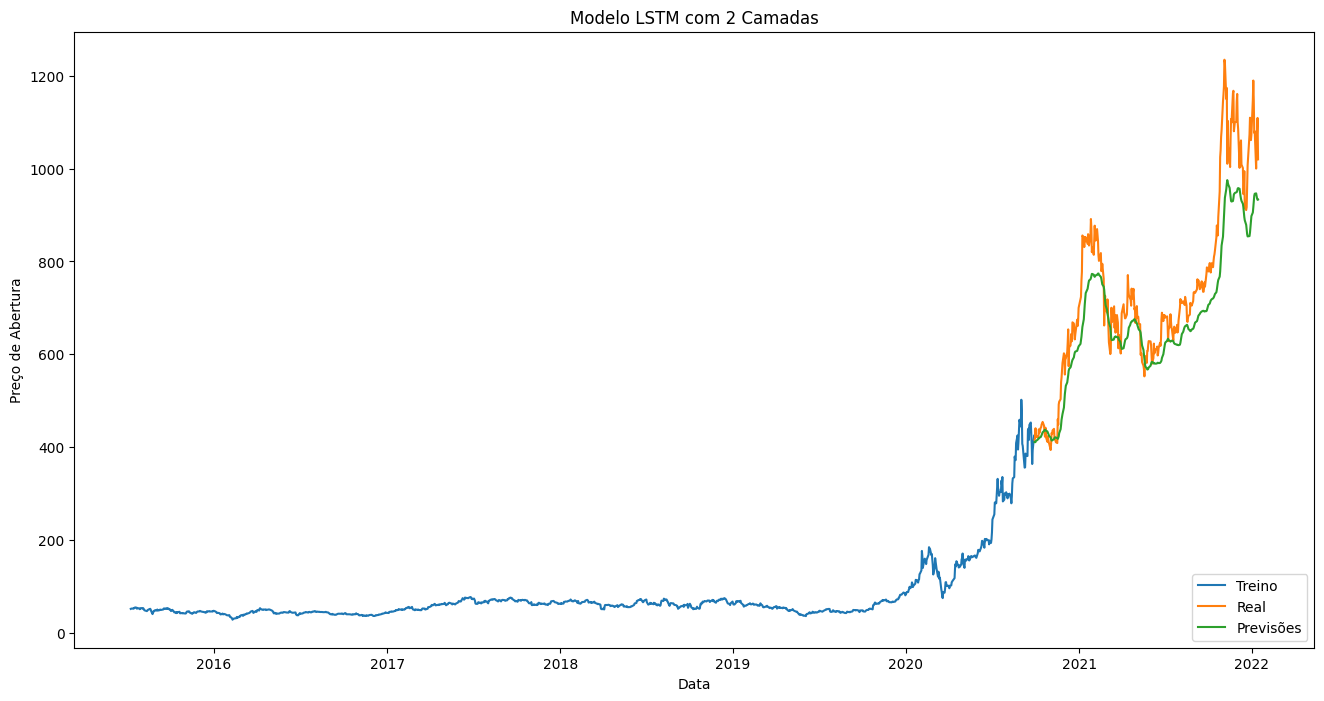

In [21]:
# Plotar os resultados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Modelo LSTM com 2 Camadas')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Treino', 'Real', 'Previsões'], loc='lower right')
plt.show()


RMSE com uma camada LSTM: 49.31

RMSE com duas camadas LSTM: 915405.81

Aumento no RMSE: Um aumento tão grande no RMSE indica que a adição da segunda camada LSTM não melhorou o modelo. Pelo contrário, piorou drasticamente o desempenho, sugerindo que o modelo se tornou muito complexo para os dados, levando a um overfitting extremo ou instabilidade no treinamento.

PARTE III

Adicione um Dropout de 20% após cada camada LSTM e reporte se houve melhora.

Modificando o modelo para incluir Dropout

In [22]:
from tensorflow.keras.layers import Dropout

# Criar o modelo com Dropout após cada LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Adicionar Dropout de 20%
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  # Adicionar Dropout de 20%
model.add(Dense(1))  # Camada de saída

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, batch_size=1, epochs=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1256/1256 ━━━━━━━━━━━━━━━━━━━━ 46s 34ms/step - loss: 5.6601e-04


**Fazendo previsões e avaliando o modelo**

In [23]:
# Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverter a normalização para y_test
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
RMSE: 1104752455.1085265


<ipython-input-24-72ec5fc39593>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


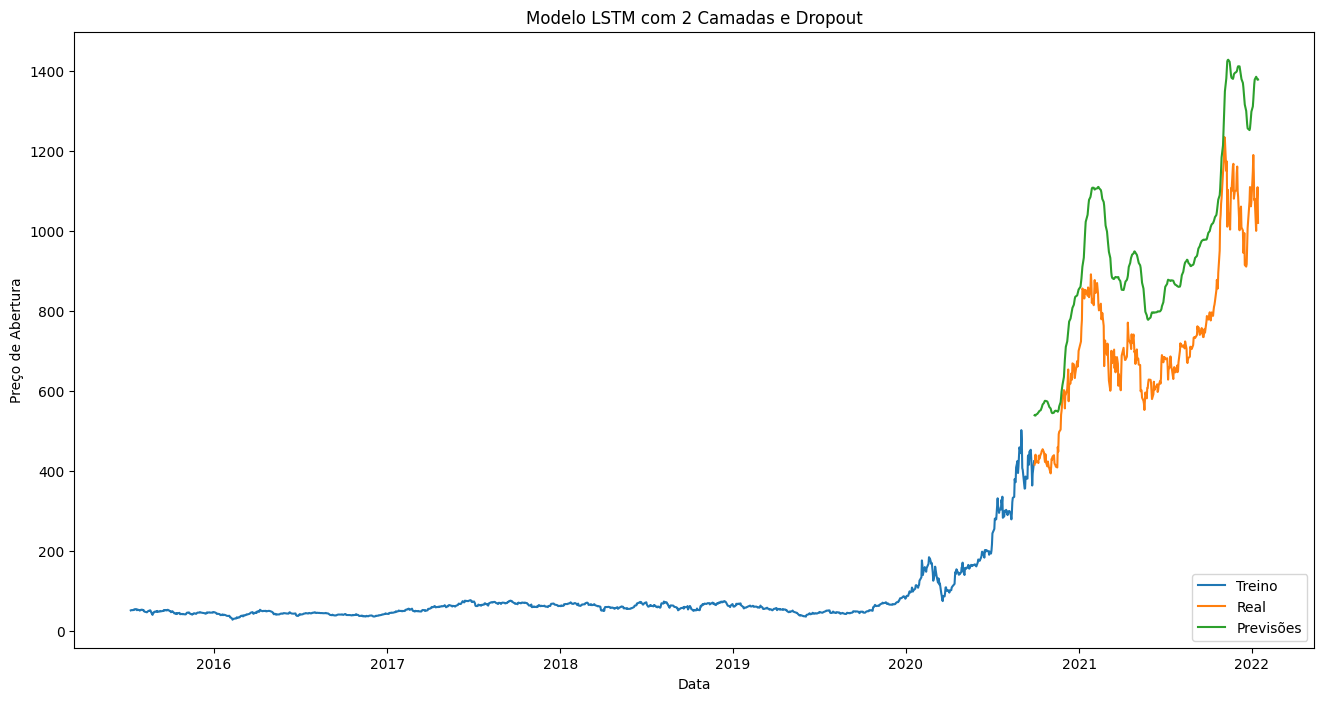

In [24]:
# Plotar os resultados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Modelo LSTM com 2 Camadas e Dropout')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Treino', 'Real', 'Previsões'], loc='lower right')
plt.show()


O valor do RMSE aumentou ainda mais para 1.104.752.455,11 após a adição de Dropout de 20% nas camadas LSTM. Isso indica que o desempenho do modelo piorou significativamente.

# **PARTE IV**

Finalmente, modifique o modelo para que ele tenha 4 blocos LSTM (50 unidades ocultas) + Dropout (20 %) antes da camada Dense. Reporte os resultados deste último modelo e compare com os demais

**Criando o modelo com 4 blocos LSTM e Dropout**

In [25]:
# Criar o modelo com 4 blocos LSTM e Dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))  # Camada de saída

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, batch_size=1, epochs=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1256/1256 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - loss: 0.0013


Fazendo previsões e avaliando o modelo

In [26]:
# Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverter a normalização para y_test
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step
RMSE: 1332273005756.154


Visualizando os resultados

<ipython-input-27-6274fa2a54cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


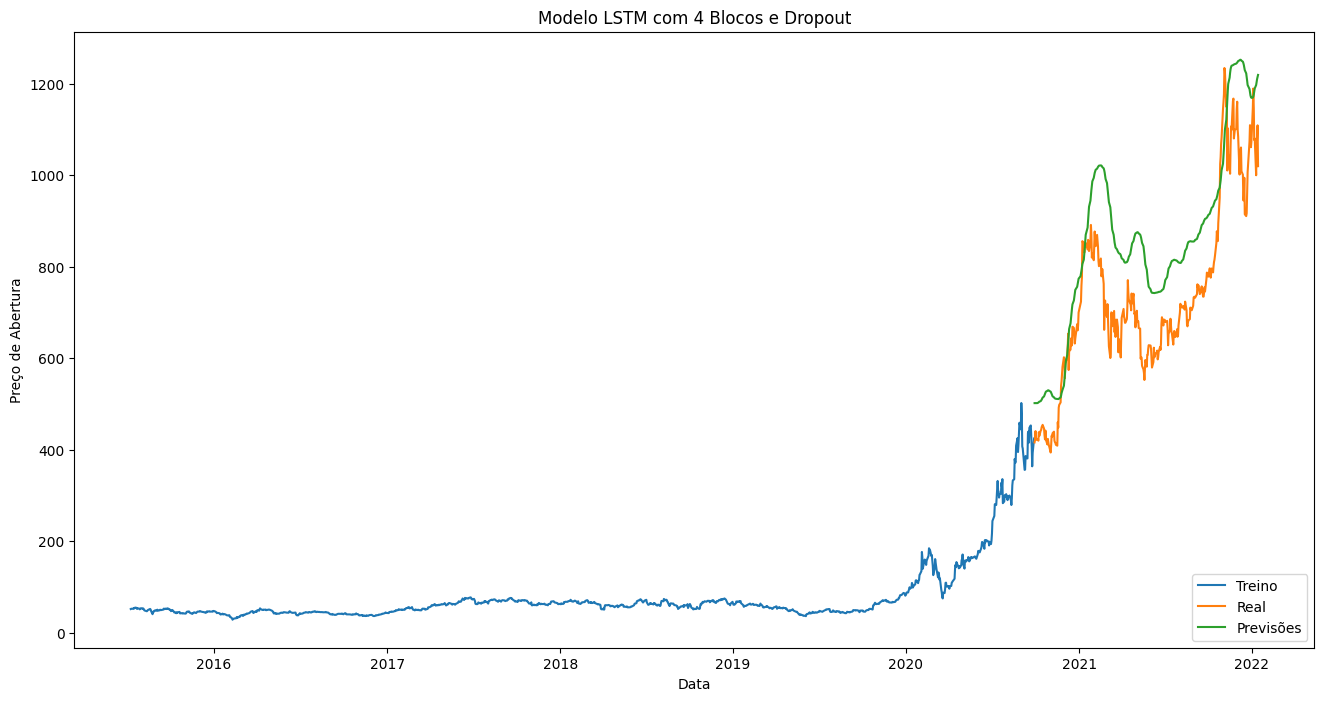

In [27]:
# Plotar os resultados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Modelo LSTM com 4 Blocos e Dropout')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Treino', 'Real', 'Previsões'], loc='lower right')
plt.show()


O valor do RMSE para o modelo com 4 blocos LSTM e Dropout de 20% é 1.332.273.005.756,15. Isso é significativamente maior que os valores anteriores, indicando que o modelo se tornou ainda mais impreciso.

# **Comparação dos Modelos:**

Modelo com 1 camada LSTM: RMSE: 49.31

Modelo com 2 camadas LSTM: RMSE: 915.405.809,77

Modelo com 2 camadas LSTM + Dropout: RMSE: 1.104.752.455,11

Modelo com 4 blocos LSTM + Dropout: RMSE: 1.332.273.005.756,15

# **Interpretação dos Resultados:**

Aumento do RMSE: O aumento significativo no RMSE sugere que a adição de mais camadas LSTM e Dropout não está melhorando o modelo, mas, ao contrário, está prejudicando seu desempenho. Esse comportamento pode ser causado por:

Excesso de Complexidade: O modelo está muito complexo e não está conseguindo se ajustar adequadamente aos dados. A adição de mais camadas e Dropout pode ter feito com que o modelo perdesse informações cruciais ou não conseguisse aprender padrões relevantes.

Overfitting: A complexidade extra e o Dropout podem ter resultado em um modelo que não generaliza bem para os dados de teste.